# Auto MPG Regression

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import dataset

This is a dataset containing several values related to almost 400 cars

In [2]:
dataset = pd.read_csv("/home/joe/Documents/ML-Resources/auto-mpg.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Clean missing values

The dataset has 6 missing values

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:4])
x[:, 1:4] = imputer.transform(x[:, 1:4])

## Split dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## Train the model

Decision Tree actually gives amazing results

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

## Predict test result sets

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[29.  29. ]
 [27.2 30.7]
 [17.5 20.2]
 [16.2 17. ]
 [22.4 20.6]
 [33.5 29. ]
 [29.  24. ]
 [34.4 34.1]
 [16.  14.5]
 [18.  18. ]
 [27.  27. ]
 [15.5 15.5]
 [17.6 19.2]
 [28.  21.5]
 [37.  39. ]
 [21.5 25. ]
 [14.  14. ]
 [18.  21. ]
 [15.  13. ]
 [34.5 37.3]
 [16.5 18. ]
 [25.5 24.5]
 [27.  27. ]
 [25.  28. ]
 [20.2 19.1]
 [15.  11. ]
 [23.7 32.9]
 [31.5 39.4]
 [14.  15. ]
 [18.1 22. ]
 [20.2 38. ]
 [14.  14. ]
 [27.  26. ]
 [21.1 27.2]
 [26.  26. ]
 [15.  14. ]
 [28.  27. ]
 [11.  13. ]
 [36.  32. ]
 [15.  16. ]
 [26.  23. ]
 [31.5 30.5]
 [18.5 16.5]
 [23.7 34.5]
 [32.  33.5]
 [20.2 20.8]
 [15.5 16. ]
 [13.  14. ]
 [25.  23. ]
 [22.  17.5]
 [26.  26. ]
 [46.6 40.8]
 [13.  13. ]
 [15.  14. ]
 [31.5 30. ]
 [20.  23. ]
 [14.  13. ]
 [15.  17. ]
 [29.  28. ]
 [29.8 32. ]
 [36.  37. ]
 [36.  38. ]
 [15.5 17. ]
 [36.  30. ]
 [35.7 31.9]
 [31.  38.1]
 [32.  26.8]
 [20.2 17.6]
 [25.8 26.6]
 [12.  13. ]
 [19.4 18.2]
 [19.  28. ]
 [14.  15. ]
 [28.1 25.4]
 [13.  12. ]
 [26.  24. ]
 [28.1 30. ]

## Visualize tree

This tree uses several features of a car to determine its MPG. It requires a MASSIVE file to be readable

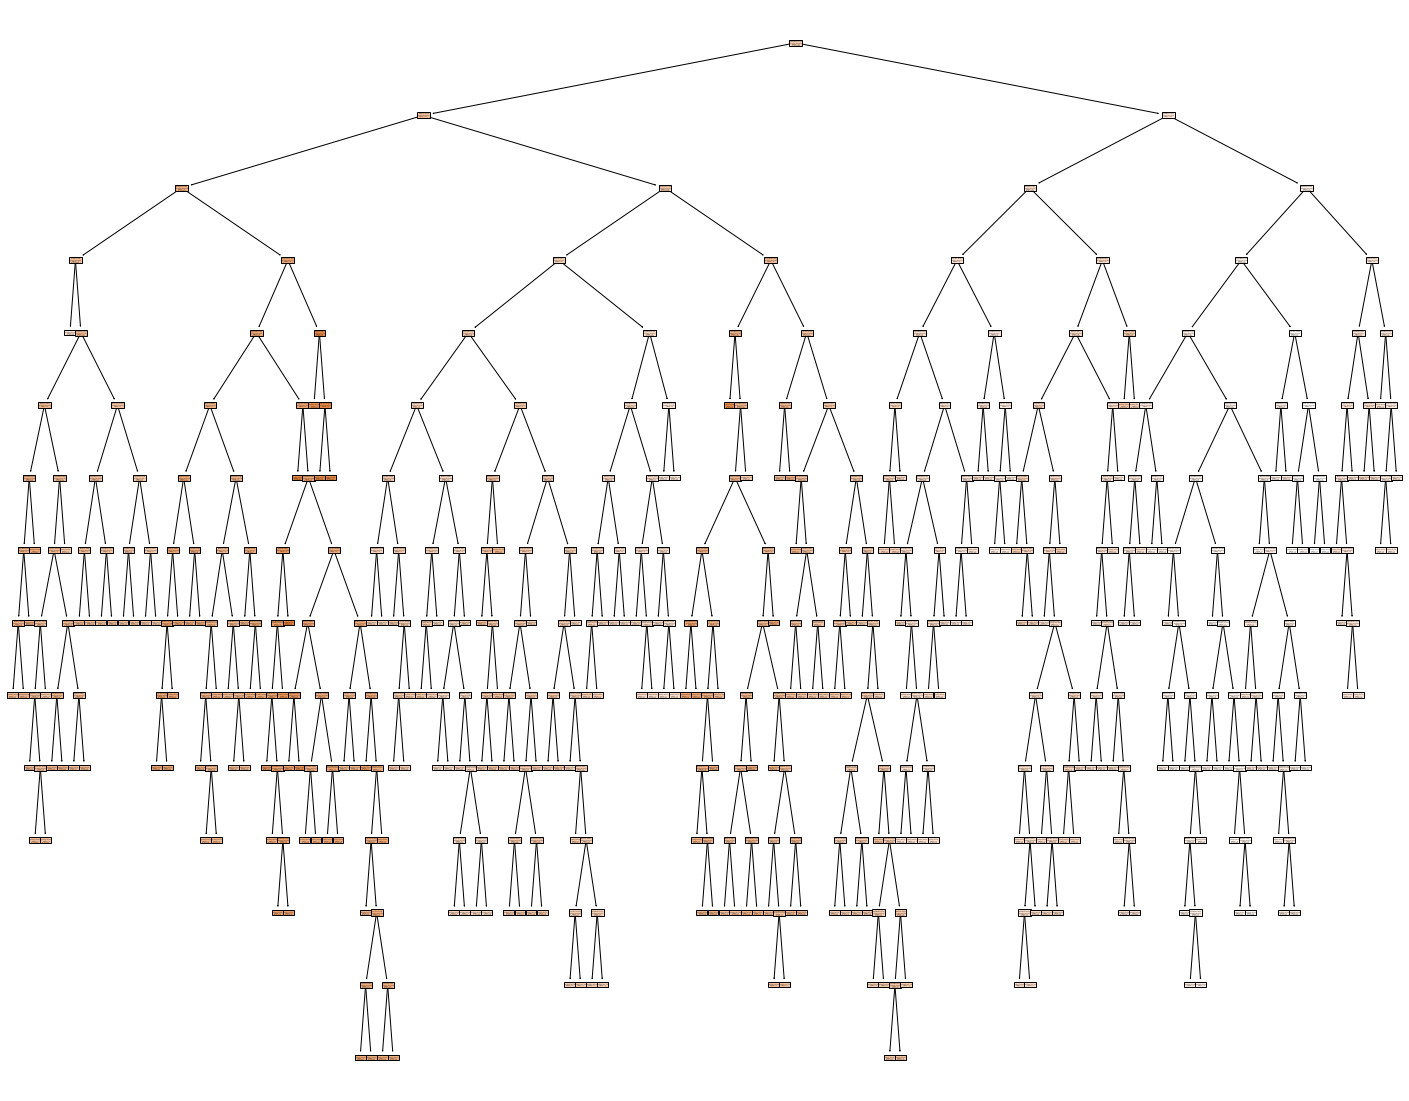

In [7]:
from sklearn import tree

features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]

fig = plt.figure(figsize = (25, 20))

_ = tree.plot_tree(regressor, feature_names=features, filled=True)

In [8]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.7663548794264182